## Fourierrekker med MATLAB

### Kort fortalt

Finn periode $T$ og halvperiode bredde, $\displaystyle L = \frac T 2$ , av funksjonens definisjonsmengde.

Finn funksjonens symmetriegenskaper, det kan være   

(1) Like funksjon, symmetri om y-aksen, $f(x) = f(-x)$ , <i>a</i><sub>0</sub> og <i>a</i><sub>n</sub>  skal beregnes.
      $$a_0 = \displaystyle \frac 2 L \int_{0}^{L} f(x) dx$$   
      $$a_n = \displaystyle \frac 2 L \int_{0}^{L} f(x) \cdot \cos(\frac{n \pi} L x) dx$$   
(2) Odde funksjon, symmetri om origo, $f(x) = - f(-x)$ , <i>b</i><sub>n</sub> skal beregnes.   
      $$b_n = \displaystyle \frac 2 L \int_{0}^{L} f(x) \cdot \sin(\frac{n \pi} L x) dx$$   
(3) Ingen symmetri,						<i>a</i><sub>0</sub> , <i>a</i><sub>n</sub> og <i>b</i><sub>n</sub> skal beregnes.   
      $$a_0 = \displaystyle \frac 1 L \int_{-L}^{L} f(x) dx$$   
      $$a_n = \displaystyle \frac 1 L \int_{-L}^{L} f(x) \cdot \cos(\frac{n \pi} L x) dx$$   
      $$b_n = \displaystyle \frac 1 L \int_{-L}^{L} f(x) \cdot \sin(\frac{n \pi} L x) dx$$   
      
Sett inn for n = 1, 2, 3, 4, ... i uttrykkene for  <i>a</i><sub>0</sub>, <i>a</i><sub>n</sub> og <i>b</i><sub>n</sub> som ble funnet i (1), (2) eller (3) og finn deretter et generelt uttrykk med n som variabel for leddene.

### Eksempel

La oss finne Fourierrekka for 'sagtannfunksjonen'  ![Sagtann](https://dl.dropboxusercontent.com/u/2113110/resources/sagtann3.png) $$f(t) = \frac t 2 - 1\;\;,\;\; -4 < t \le 4\;\;,\;\;f(t + 8) = f(t)$$

Her er L=4 og vi har ingen symmetri, altså full beregning.

In [3]:
t = sym('t');

In [21]:
n = sym('n', 'Integer');
f = t/2 - 1;
L = 4;

In [8]:
a0 = 1/L*int(f, t, -L, L)    

a0 =
-2


In [9]:
an = 1/L*int(f*cos(n*pi/L*t), t, -L, L)

an =
0


Kommentar: Fourierrekka består altså av bare middelverdi og sinusledd. Dette kunne vi ha sett ved at grafen viser en odde funksjon hvis vi ser bort fra middelverdien på -1

In [10]:
bn = 1/L*int(f*sin(n*pi/L*t), t, -L, L)

bn =
(4*sin(pi*n) - 4*n*pi*cos(pi*n))/(n^2*pi^2)


Uttrykket for bn kan forenkles ved at sin(n*pi) = +- 1 og cos(n*pi) = 0, men dette kan Matlab gjøre:

In [11]:
bns = simplify(bn)

bns =
-(4*(-1)^n)/(n*pi)


Matlab har laget et enkel uttrykk for bn, la oss vise det med LaTeX:

In [16]:
bnx = latex(bns)

bnx =
-\frac{4\, {\left(- 1\right)}^n}{n\, \pi}


Setter vi dette inn i markdown blir det $$b_n = -\frac{4\, {\left(- 1\right)}^n}{n\, \pi}$$

Vi har nå det vi trenger for å sette opp fourierrekka, $$F = \frac {a_0} {2} + \sum_{n=1}^{\infty} a_n \cdot \cos(\frac{n \pi t}L) + \sum_{n=1}^{\infty} b_n \cdot \sin(\frac{n \pi t}L)$$

$$F = -1 + \frac 4 {\pi} \sum_{n=1}^{\infty}(-1)^{n-1}\frac 1 n \cdot \sin(\frac{n \pi}L t)$$

Vi kan sjekke om dette ser ut til å være riktig uttrykk for den gitte sagtannfunksjonen ved å plotte grafen til for eksempel de 7 første leddene i rekka. Lar indeksvektoren N=1:7 erstatte indeks n og beregner rekkesummen F7:

In [13]:
N = 1:7;
F7 = -1 + symsum(bns*sin(n*pi/L*t), n, 1, 7)

F7 =
(4*sin((pi*t)/4))/pi - (2*sin((pi*t)/2))/pi - sin(pi*t)/pi - (2*sin((3*pi*t)/2))/(3*pi) + (4*sin((3*pi*t)/4))/(3*pi) + (4*sin((5*pi*t)/4))/(5*pi) + (4*sin((7*pi*t)/4))/(7*pi) - 1


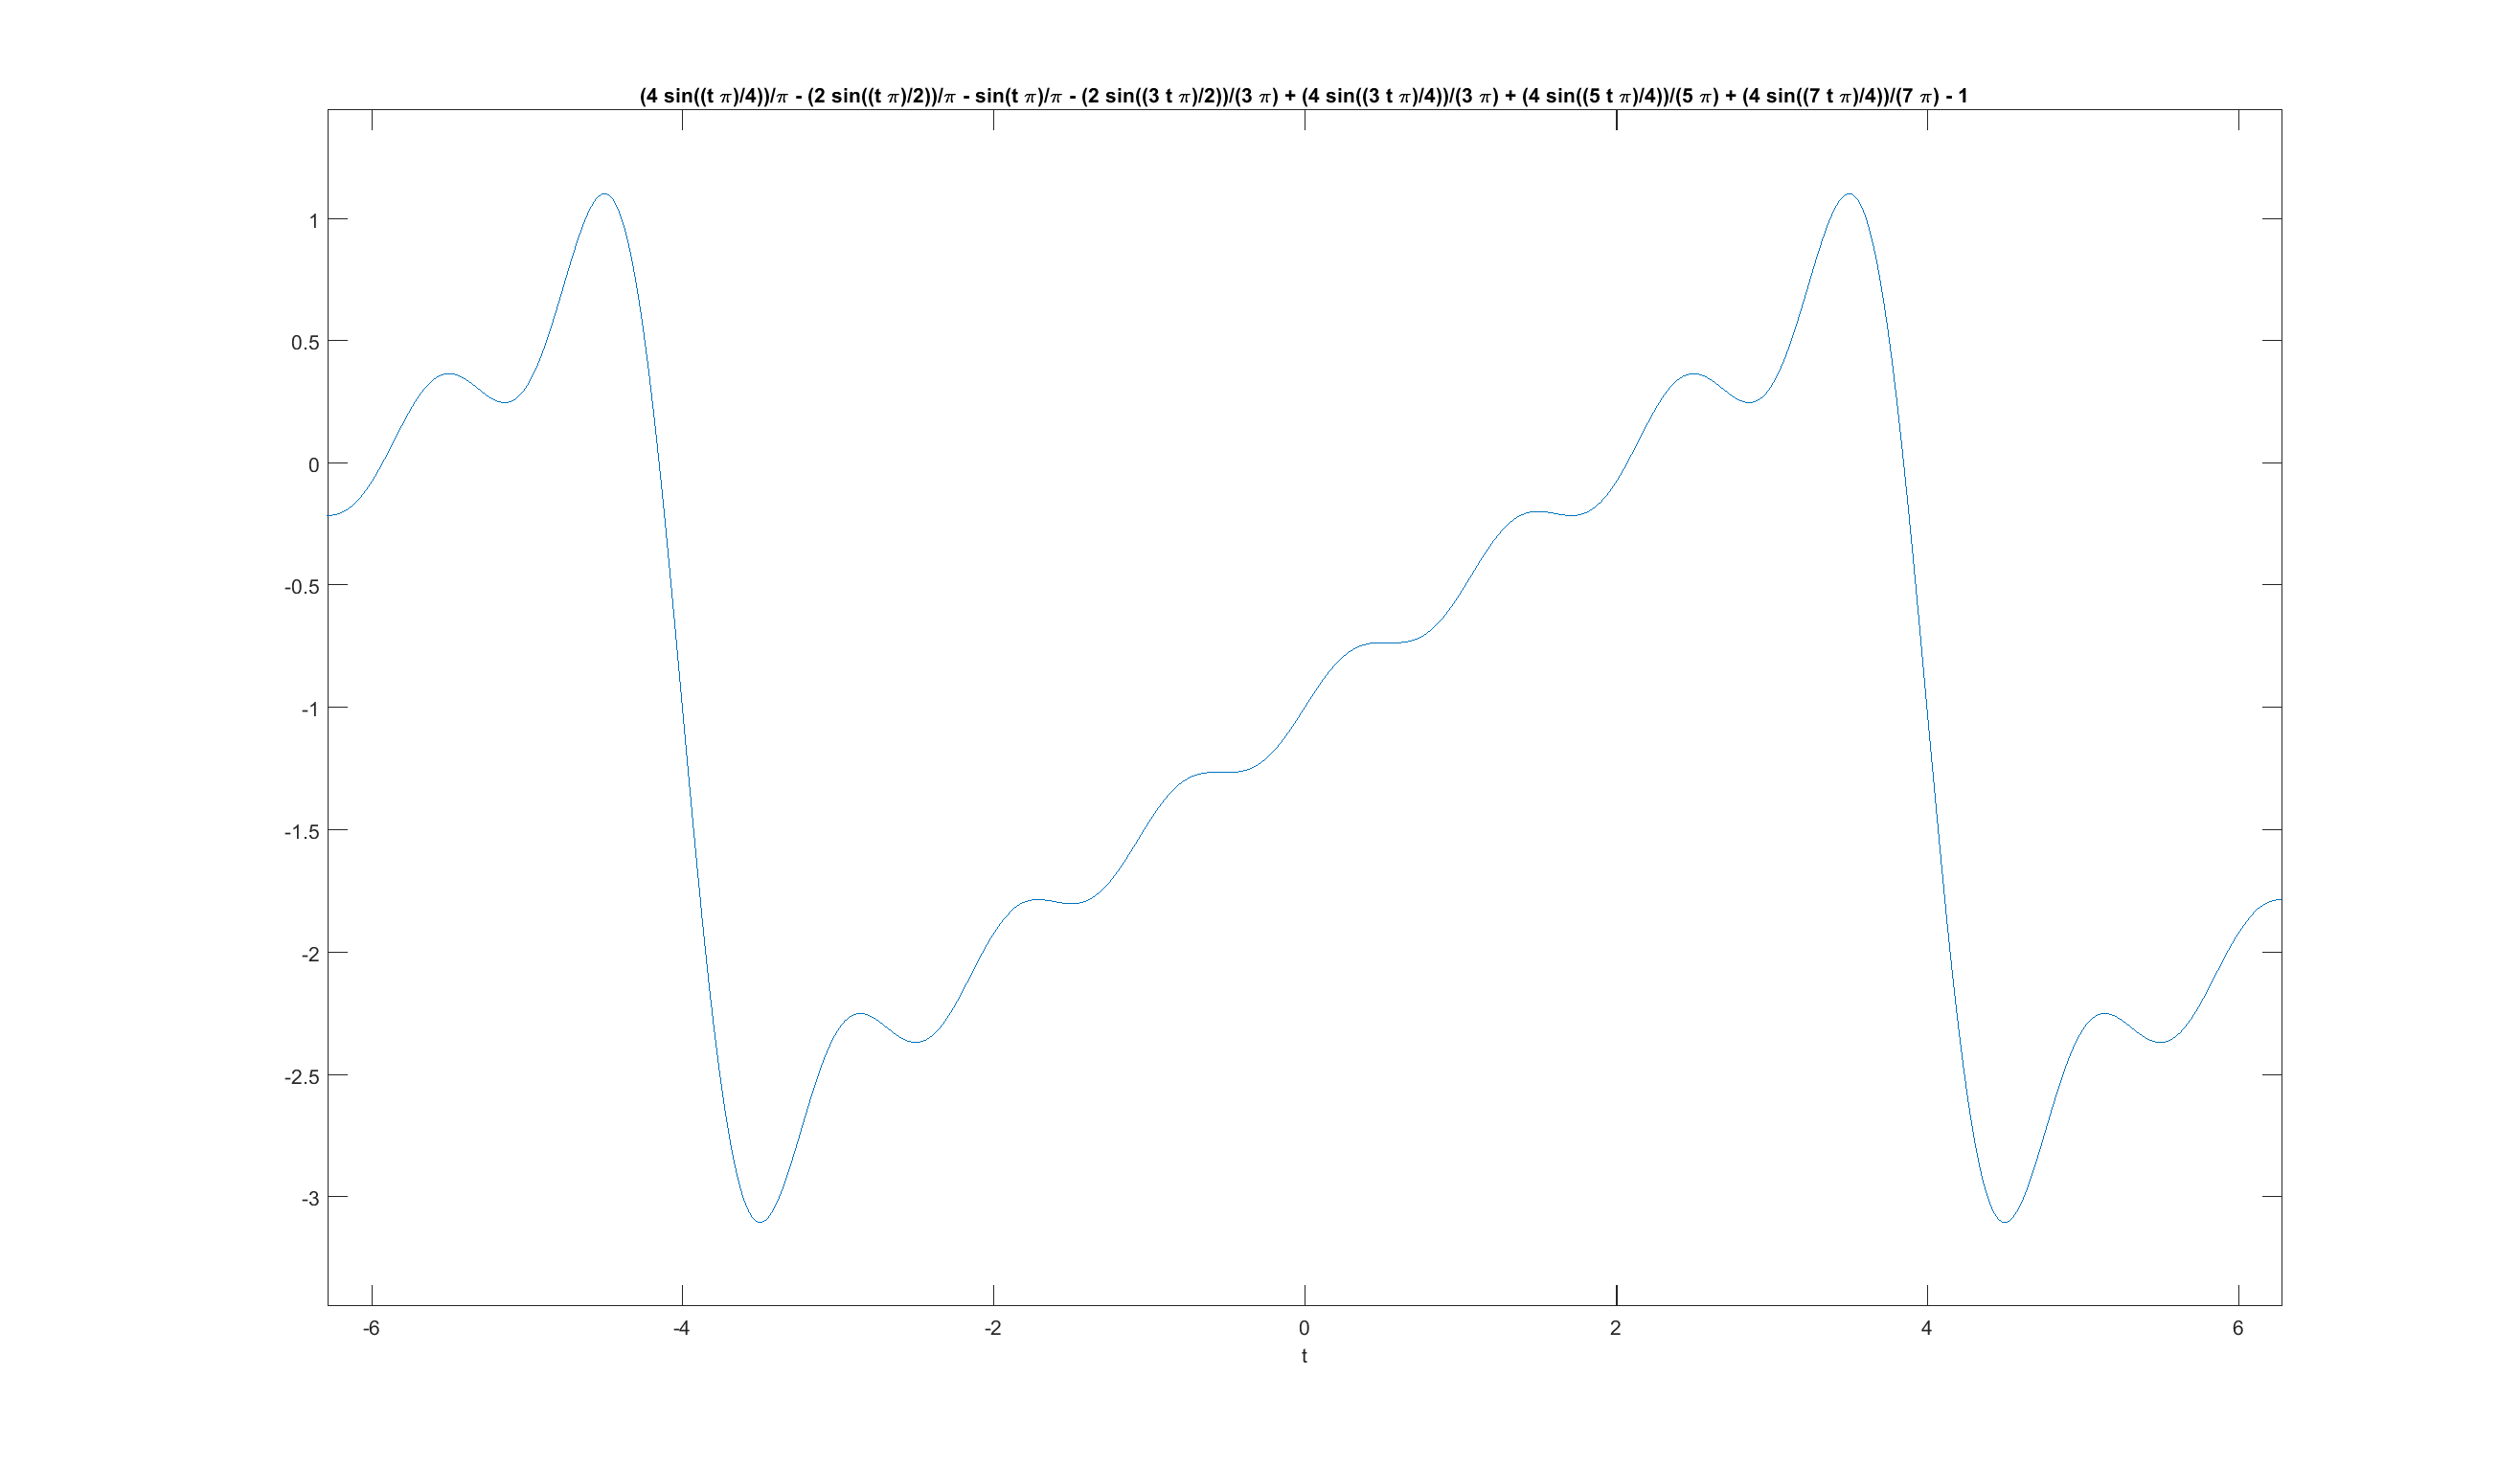

[Warning: MATLAB has disabled some advanced graphics rendering features by switching to software OpenGL. For more information, click <a
href="matlab:opengl('problems')">here</a>.]


In [14]:
ezplot(F7)